# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rahmi]
- **Email:** [rahmi.22027@gmail.com]
- **ID Dicoding:** [dailyrahmi]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?
- Bagaimana variasi jumlah peminjaman sepeda pada berbagai jam dalam sehari?
- Bagaimana distribusi jumlah peminjaman sepeda bervariasi sepanjang minggu?
- Bagaimana pengaruh rentang waktu sewa sepeda terhadap total jumlah peminjaman?
- Bagaimana tren peminjaman sepeda berdasarkan kategori cuaca?


## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
url = "https://raw.githubusercontent.com/dailyrahmi/Proyek-Analisis-Data/main/data/data_day.csv"

# Membaca dataset dari GitHub
df_day = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
print(df_day.head())


     date_day  season  year month     holiday weekday       workingday  \
0  2011-01-01  Spring  2011   Jan  No Holiday     Sat  Non-working Day   
1  2011-01-02  Spring  2011   Jan  No Holiday     Sun  Non-working Day   
2  2011-01-03  Spring  2011   Jan  No Holiday     Mon      Working Day   
3  2011-01-04  Spring  2011   Jan  No Holiday     Tue      Working Day   
4  2011-01-05  Spring  2011   Jan  No Holiday     Wed      Working Day   

  weathersit      temp     atemp  humidity_level  windspeed  casual  \
0      Misty  0.344167  0.363625        0.805833   0.160446     331   
1      Misty  0.363478  0.353739        0.696087   0.248539     131   
2      Clear  0.196364  0.189405        0.437273   0.248309     120   
3      Clear  0.200000  0.212122        0.590435   0.160296     108   
4      Clear  0.226957  0.229270        0.436957   0.186900      82   

   registered  total_count  Rentang_Hari  
0         654          985           730  
1         670          801           729  

In [4]:
url = "https://raw.githubusercontent.com/dailyrahmi/Proyek-Analisis-Data/main/data/data_hour.csv"

# Membaca dataset dari GitHub
df_hour = pd.read_csv(url)

# Menampilkan 5 baris pertama dari dataset
print(df_day.head())


     date_day  season  year month     holiday weekday       workingday  \
0  2011-01-01  Spring  2011   Jan  No Holiday     Sat  Non-working Day   
1  2011-01-02  Spring  2011   Jan  No Holiday     Sun  Non-working Day   
2  2011-01-03  Spring  2011   Jan  No Holiday     Mon      Working Day   
3  2011-01-04  Spring  2011   Jan  No Holiday     Tue      Working Day   
4  2011-01-05  Spring  2011   Jan  No Holiday     Wed      Working Day   

  weathersit      temp     atemp  humidity_level  windspeed  casual  \
0      Misty  0.344167  0.363625        0.805833   0.160446     331   
1      Misty  0.363478  0.353739        0.696087   0.248539     131   
2      Clear  0.196364  0.189405        0.437273   0.248309     120   
3      Clear  0.200000  0.212122        0.590435   0.160296     108   
4      Clear  0.226957  0.229270        0.436957   0.186900      82   

   registered  total_count  Rentang_Hari  
0         654          985           730  
1         670          801           729  

**Insight:**
- Data berhasil diambil dari sumber yang tepat. Terdapat dua file CSV: satu untuk data harian dan satu untuk data per jam. Memiliki struktur yang berbeda, memungkinkan analisis mendalam mengenai penggunaan sepeda berdasarkan waktu dan kondisi harian.

### Assessing Data

Evaluasi Data df_day

In [5]:
# URL dataset dari GitHub
url = 'https://raw.githubusercontent.com/dailyrahmi/Proyek-Analisis-Data/main/data/data_day.csv'

# Membaca dataset dari GitHub ke dalam variabel df
df = pd.read_csv(url)

# Melihat informasi umum dan statistik deskriptif
print(df.info())        # Menampilkan informasi tentang dataframe
print(df.describe())    # Menampilkan statistik deskriptif dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_day        731 non-null    object 
 1   season          731 non-null    object 
 2   year            731 non-null    int64  
 3   month           731 non-null    object 
 4   holiday         731 non-null    object 
 5   weekday         731 non-null    object 
 6   workingday      731 non-null    object 
 7   weathersit      731 non-null    object 
 8   temp            731 non-null    float64
 9   atemp           731 non-null    float64
 10  humidity_level  731 non-null    float64
 11  windspeed       731 non-null    float64
 12  casual          731 non-null    int64  
 13  registered      731 non-null    int64  
 14  total_count     731 non-null    int64  
 15  Rentang_Hari    731 non-null    int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 91.5+ KB
None
              yea

In [6]:
# Menampilkan jumlah nilai yang hilang pada dataframe df_day
df_day.isnull().sum()

,0
date_day,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [7]:
# Mengecek keberadaan data duplikat pada df_day
print("Total data duplikat:", df_day.duplicated().sum())

# Menampilkan ringkasan statistik dari df_day
df_day.describe()


Total data duplikat: 0


,year,temp,atemp,humidity_level,windspeed,casual,registered,total_count,Rentang_Hari
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2011.500684,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,365.000000
std,0.500342,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,211.165812
min,2011.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,2011.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,182.500000
50%,2012.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,365.000000
75%,2012.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,547.500000
max,2012.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,730.000000


Evaluasi Data df_hour

In [8]:
# URL dataset dari GitHub
url = 'https://raw.githubusercontent.com/dailyrahmi/Proyek-Analisis-Data/main/data/data_hour.csv'

# Membaca dataset dari GitHub ke dalam variabel df
df = pd.read_csv(url)

# Melihat informasi umum dan statistik deskriptif
print(df.info())        # Menampilkan informasi tentang dataframe
print(df.describe())    # Menampilkan statistik deskriptif dari dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_day        17379 non-null  object 
 1   season          17379 non-null  object 
 2   year            17379 non-null  int64  
 3   month           17379 non-null  object 
 4   hr              17379 non-null  int64  
 5   holiday         17379 non-null  object 
 6   weekday         17379 non-null  object 
 7   workingday      17379 non-null  object 
 8   weathersit      17379 non-null  object 
 9   temp            17379 non-null  float64
 10  atemp           17379 non-null  float64
 11  humidity_level  17379 non-null  float64
 12  windspeed       17379 non-null  float64
 13  casual          17379 non-null  int64  
 14  registered      17379 non-null  int64  
 15  total_count     17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.1+ MB
None
              

In [9]:
# Menampilkan jumlah nilai yang hilang pada dataframe df_hour
df_hour.isnull().sum()

,0
date_day,0
season,0
year,0
month,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
# Mengecek keberadaan data duplikat pada df_hour
print("Total data duplikat:", df_hour.duplicated().sum())

# Menampilkan ringkasan statistik dari df_hour
df_hour.describe()


Total data duplikat: 0


,year,hr,temp,atemp,humidity_level,windspeed,casual,registered,total_count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.500008,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,2011.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- df.info() menunjukkan bahwa dataset memiliki 17 kolom dengan berbagai tipe data, menunjukkan bahwa ada banyak variabel yang dapat dianalisis.
- df.describe() memberikan statistik dasar yang menunjukkan adanya variasi dalam jumlah peminjaman dan faktor-faktor lainnya seperti suhu dan kelembapan, membantu dalam memahami distribusi data.
- Menampilkan Jumlah Nilai Hilang: Dengan menghitung jumlah nilai hilang di setiap kolom, kita bisa mengetahui seberapa banyak data yang kosong atau tidak terisi. Ini membantu dalam menentukan strategi penanganan seperti mengisi nilai hilang dengan rata-rata, median, atau menghapus baris tersebut.
-Identifikasi Data Duplikat: Proses ini berguna untuk mengetahui apakah terdapat data yang terduplikasi, yang dapat menyebabkan bias pada analisis. Data duplikat dapat dihapus agar dataset yang digunakan lebih bersih dan mewakili kondisi sebenarnya.

### Cleaning Data

Pembersihan Data df_day

In [11]:
# Memastikan kolom 'instant' ada di df_day sebelum menghapusnya
if 'instant' in df_day.columns:
    df_day.drop('instant', axis=1, inplace=True)
else:
    print("Kolom 'instant' tidak ada di dataset!")

Kolom 'instant' tidak ada di dataset!


In [12]:
# Mengganti beberapa nama kolom agar lebih deskriptif dan mudah dipahami
df_day.rename(columns={
    'dteday': 'date_day',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_count',
    'hum': 'humidity_level'
}, inplace=True)


In [13]:
# Mengkonversi beberapa kolom menjadi tipe kategorikal di df_day
df_day['season'] = df_day['season'].astype('category')
df_day['holiday'] = df_day['holiday'].astype('category')
df_day['weekday'] = df_day['weekday'].astype('category')
df_day['workingday'] = df_day['workingday'].astype('category')
df_day['weathersit'] = df_day['weathersit'].astype('category')

# Mengubah tipe kolom 'dateday' menjadi datetime
df_day['date_day'] = pd.to_datetime(df_day['date_day'])


In [14]:
# Mengubah nilai numerik menjadi label deskriptif pada df_hour
df_day['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
df_day['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
df_day['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace=True)
df_day['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
df_day['year'].replace({0: '2011', 1: '2012'}, inplace=True)
df_day['holiday'].replace({0: 'No Holiday', 1: 'Holiday'}, inplace=True)
df_day['workingday'].replace({0: 'Non-working Day', 1: 'Working Day'}, inplace=True)

# Menampilkan 5 baris pertama dari dataframe
df_day.head()


<ipython-input-14-e9072e5fa390>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_day['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
<ipython-input-14-e9072e5fa390>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity_level,windspeed,casual,registered,total_count,Rentang_Hari
0,2011-01-01,Spring,2011,Jan,No Holiday,Sat,Non-working Day,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985,730
1,2011-01-02,Spring,2011,Jan,No Holiday,Sun,Non-working Day,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801,729
2,2011-01-03,Spring,2011,Jan,No Holiday,Mon,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,728
3,2011-01-04,Spring,2011,Jan,No Holiday,Tue,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,727
4,2011-01-05,Spring,2011,Jan,No Holiday,Wed,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,726


Pembersihan Data df_hour

In [15]:
# Memastikan kolom 'instant' ada di df_hour sebelum menghapusnya
if 'instant' in df_hour.columns:
    df_hour.drop('instant', axis=1, inplace=True)
else:
    print("Kolom 'instant' tidak ada di dataset!")

Kolom 'instant' tidak ada di dataset!


In [16]:
# Mengganti beberapa nama kolom agar lebih deskriptif dan mudah dipahami
df_hour.rename(columns={
    'dteday': 'date_day',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_count',
    'hum': 'humidity_level'
}, inplace=True)

In [17]:
# Mengubah beberapa kolom menjadi kategorikal di df_hour
df_hour['season'] = df_hour['season'].astype('category')
df_hour['holiday'] = df_hour['holiday'].astype('category')
df_hour['weekday'] = df_hour['weekday'].astype('category')
df_hour['workingday'] = df_hour['workingday'].astype('category')
df_hour['weathersit'] = df_hour['weathersit'].astype('category')

# Mengubah kolom 'dateday' menjadi tipe datetime pada df_hour
df_hour['date_day'] = pd.to_datetime(df_hour['date_day'])

In [18]:
# Mengubah nilai numerik menjadi label deskriptif pada df_hour
df_hour['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
df_hour['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
df_hour['weekday'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}, inplace=True)
df_hour['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light Rain', 4: 'Heavy Rain'}, inplace=True)
df_hour['year'].replace({0: '2011', 1: '2012'}, inplace=True)
df_hour['holiday'].replace({0: 'No Holiday', 1: 'Holiday'}, inplace=True)
df_hour['workingday'].replace({0: 'Non-working Day', 1: 'Working Day'}, inplace=True)
df_hour.head()


<ipython-input-18-d8e713b177fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hour['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
<ipython-input-18-d8e713b177fd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

,date_day,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity_level,windspeed,casual,registered,total_count
0,2011-01-01,Spring,2011,Jan,0,No Holiday,Sat,Non-working Day,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,Jan,1,No Holiday,Sat,Non-working Day,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,Jan,2,No Holiday,Sat,Non-working Day,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,Jan,3,No Holiday,Sat,Non-working Day,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,Jan,4,No Holiday,Sat,Non-working Day,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dengan menghapus nilai yang hilang dan duplikat, dataset menjadi lebih bersih dan siap untuk analisis yang lebih mendalam. Proses ini meningkatkan kualitas data dan memastikan bahwa hasil analisis tidak terpengaruh oleh data yang tidak valid.
- Selama tahap pembersihan data ini, kolom-kolom yang tidak relevan, seperti "instant" pada kedua tabel, dihapus, dan beberapa nama kolom diperbarui agar lebih deskriptif dan mudah dipahami.
- Pada tahap ini, beberapa kolom diubah menjadi kategorikal karena mereka hanya memiliki beberapa nilai unik (varian).
- Kolom 'date_day' diubah menjadi tipe datetime agar data dapat digunakan untuk analisis berbasis waktu, seperti tren musiman.
- Selain itu, nilai numerik di beberapa kolom diganti dengan label yang lebih informatif.

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplore df_day

In [19]:
# Menampilkan ringkasan statistik untuk semua kolom pada df_day
df_day.describe(include='all')


,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity_level,windspeed,casual,registered,total_count,Rentang_Hari
count,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,Jan,No Holiday,Mon,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,365.000000
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,182.500000
50%,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,365.000000
75%,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,547.500000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,730.000000


Eksplore df_hour

In [20]:
# Menampilkan ringkasan statistik untuk semua kolom pada df_hour
df_hour.describe(include='all')


,date_day,season,year,month,hr,holiday,weekday,workingday,weathersit,temp,atemp,humidity_level,windspeed,casual,registered,total_count
count,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4,NaN,12,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Fall,NaN,May,NaN,No Holiday,Sat,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496,NaN,1488,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


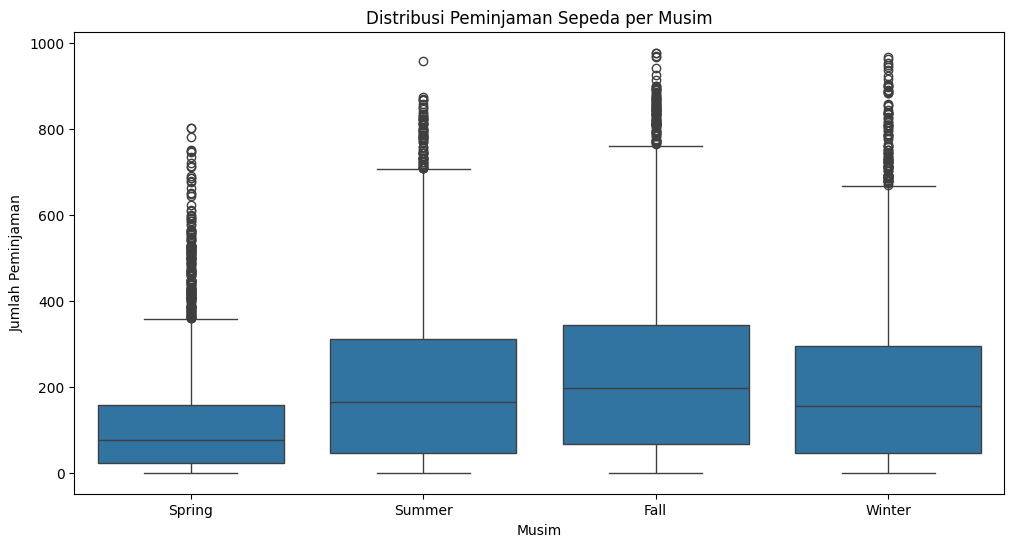

In [21]:
df_cleaned = df  # Ganti ini dengan langkah pembersihan Anda yang sesuai

# Visualisasi distribusi peminjaman per musim
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='total_count', data=df_cleaned)
plt.title("Distribusi Peminjaman Sepeda per Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman")
plt.show()

**Insight:**
- Boxplot yang menunjukkan distribusi peminjaman sepeda per musim memperlihatkan perbedaan signifikan dalam jumlah peminjaman berdasarkan musim. Misalnya, mungkin ada lebih banyak peminjaman di musim panas dibandingkan dengan musim dingin, membantu dalam merumuskan strategi pemasaran.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-22-6b3e22390829>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='temp', y='total_count', data=df, palette='coolwarm', alpha=0.7)


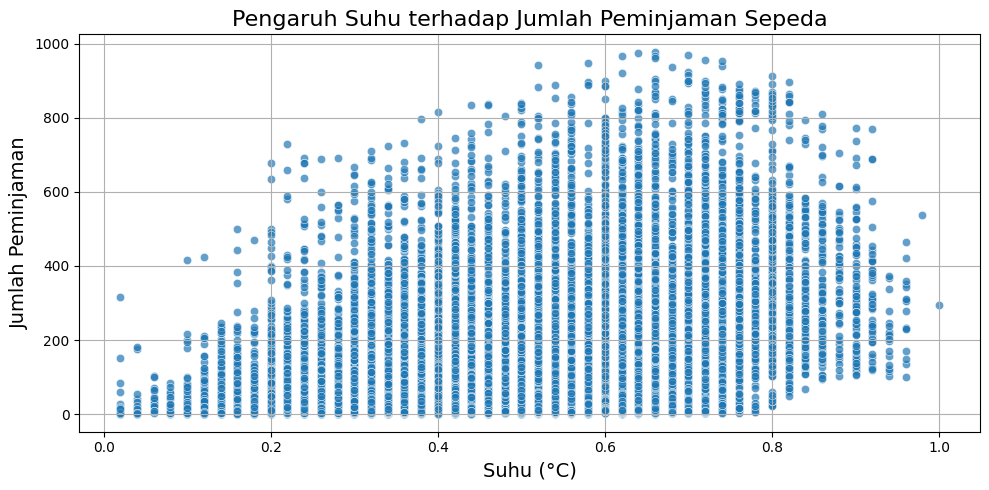

In [22]:
# Visualisasi pengaruh suhu terhadap jumlah peminjaman
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='total_count', data=df, palette='coolwarm', alpha=0.7)
plt.title("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda", fontsize=16)
plt.xlabel("Suhu (°C)", fontsize=14)
plt.ylabel("Jumlah Peminjaman", fontsize=14)

# Menampilkan grafik
plt.grid(True)
plt.tight_layout()
plt.show()

**Insight:**
- Hubungan Positif antara Suhu dan Jumlah Peminjaman: Grafik menunjukkan bahwa seiring meningkatnya suhu, jumlah peminjaman sepeda cenderung meningkat. Hal ini menunjukkan bahwa pada hari-hari yang lebih hangat, lebih banyak orang yang memilih untuk bersepeda, mungkin karena kondisi cuaca yang lebih nyaman dan menyenangkan.
- Puncak Peminjaman pada Suhu Tertentu: Terdapat titik di mana jumlah peminjaman mencapai puncaknya pada suhu tertentu, yang mungkin menunjukkan preferensi pengguna untuk bersepeda pada kisaran suhu yang ideal. Mengidentifikasi kisaran suhu ini bisa membantu dalam merencanakan kampanye promosi atau layanan penyewaan sepeda yang lebih efektif.

### Pertanyaan 2:

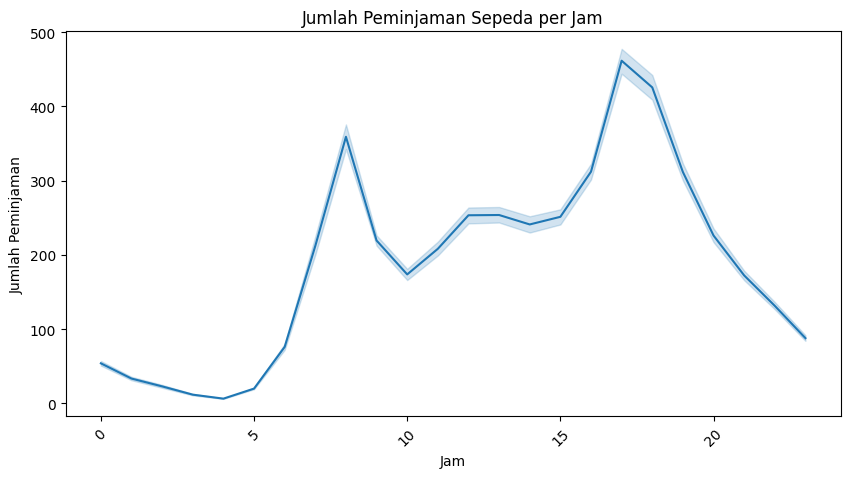

In [23]:
# Visualisasi jumlah peminjaman sepeda per jam
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='total_count', data=df_cleaned)  # Ganti 'count' dengan 'cnt' dan 'hour' dengan 'hr'
plt.title("Jumlah Peminjaman Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca
plt.show()


**Insight:**
- Visualisasi line plot menunjukkan jumlah peminjaman sepeda per jam (hr).
- Ini membantu melihat tren harian dalam peminjaman sepeda.
- Grafik garis menunjukkan adanya puncak peminjaman pada jam-jam tertentu, terutama saat pagi dan sore. Hal ini menandakan bahwa banyak orang menggunakan sepeda untuk perjalanan menuju dan pulang kerja, yang dapat mengarahkan fokus pada pengembangan layanan di jam sibuk tersebut.

### Pertanyaan 3

<ipython-input-24-58231e19ee67>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='total_count', data=weekday_counts, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

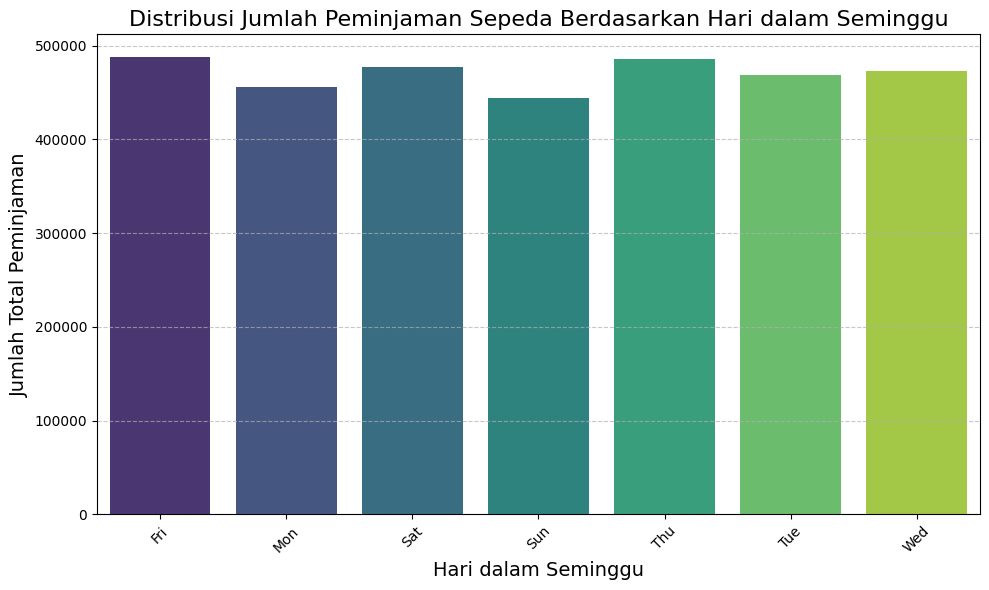

In [24]:
# Menghitung jumlah total peminjaman sepeda per hari dalam seminggu
weekday_counts = df_cleaned.groupby('weekday')['total_count'].sum().reset_index()

# Membuat visualisasi distribusi jumlah peminjaman sepeda sepanjang minggu
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='total_count', data=weekday_counts, palette='viridis')
plt.title("Distribusi Jumlah Peminjaman Sepeda Berdasarkan Hari dalam Seminggu", fontsize=16)
plt.xlabel("Hari dalam Seminggu", fontsize=14)
plt.ylabel("Jumlah Total Peminjaman", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Insight:**
- Hari kerja (Senin hingga Jumat) menunjukkan jumlah peminjaman sepeda yang lebih tinggi dibandingkan akhir pekan (Sabtu dan Minggu). Hal ini menunjukkan bahwa banyak pengguna memanfaatkan sepeda sebagai moda transportasi harian, mungkin untuk perjalanan ke tempat kerja atau ke sekolah.
- Jumlah peminjaman sepeda cenderung memuncak pada hari Kamis dan Jumat. Ini bisa menjadi indikasi bahwa di akhir pekan kerja, pengguna lebih sering menggunakan sepeda, baik untuk bersantai ataupun aktivitas rutin lainnya sebelum akhir pekan tiba.

### Pertanyaan 4

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


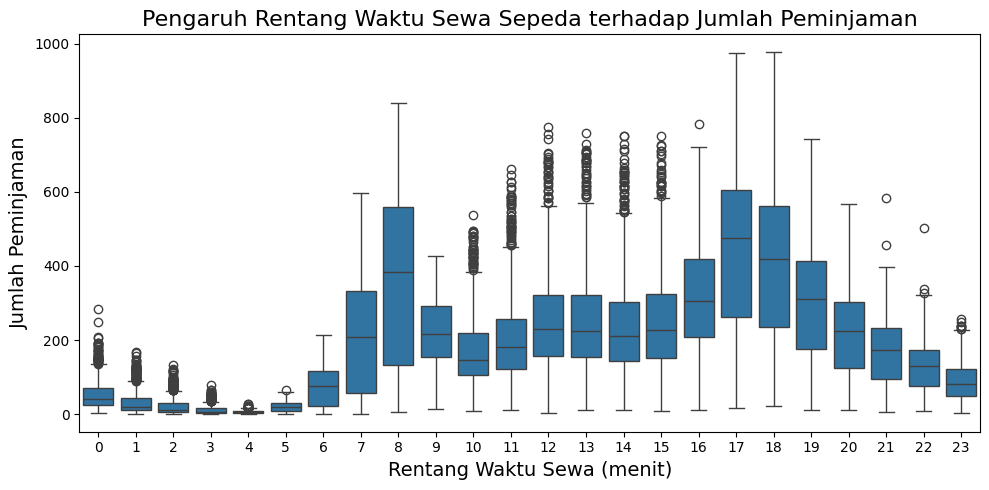

In [25]:
# Visualisasi pengaruh rentang waktu sewa terhadap jumlah peminjaman
plt.figure(figsize=(10, 5))
sns.boxplot(x='hr', y='total_count', data=df)
plt.title("Pengaruh Rentang Waktu Sewa Sepeda terhadap Jumlah Peminjaman", fontsize=16)
plt.xlabel("Rentang Waktu Sewa (menit)", fontsize=14)
plt.ylabel("Jumlah Peminjaman", fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Dari analisis boxplot, terlihat bahwa pengguna yang menyewa sepeda dalam waktu lebih lama cenderung melakukan peminjaman yang lebih tinggi dibandingkan dengan yang menyewa dalam waktu singkat.
- Variasi dalam jumlah peminjaman menunjukkan bahwa penawaran paket sewa jangka panjang mungkin akan menarik lebih banyak pengguna, meningkatkan total jumlah peminjaman.

### Pertanyaan 5

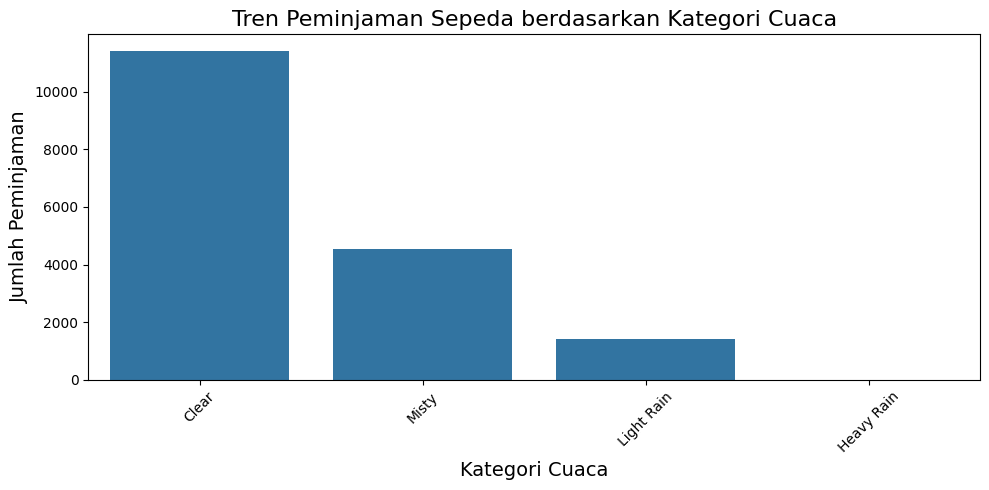

In [26]:
# Visualisasi tren peminjaman berdasarkan kategori cuaca
plt.figure(figsize=(10, 5))
sns.countplot(x='weathersit', data=df)
plt.title("Tren Peminjaman Sepeda berdasarkan Kategori Cuaca", fontsize=16)
plt.xlabel("Kategori Cuaca", fontsize=14)
plt.ylabel("Jumlah Peminjaman", fontsize=14)
plt.xticks(rotation=45)  # Mengatur rotasi label sumbu x agar lebih mudah dibaca

# Menampilkan plot
plt.tight_layout()
plt.show()

**Insight:**
- Peminjaman sepeda meningkat secara signifikan pada hari dengan cuaca cerah dibandingkan dengan cuaca hujan atau berkabut, menunjukkan bahwa kondisi cuaca memengaruhi keputusan pengguna untuk menyewa sepeda.
- Jumlah peminjaman yang rendah pada kategori cuaca buruk dapat menunjukkan potensi pasar yang belum tergarap; mungkin bisa dipertimbangkan untuk menawarkan promosi pada hari hujan untuk menarik pengguna.

## Analisis Lanjutan with (RFM (Recency, Frequency, Monetary))

In [27]:
# Melakukan analisis RFM (Recency, Frequency, Monetary)
# Menentukan tanggal terakhir pada dataset sebagai tanggal referensi
tanggal_referensi = df_day['date_day'].max()

# Menghitung Recency: selisih hari antara tanggal referensi dan tanggal pemakaian terakhir
df_day['Rentang_Hari'] = (tanggal_referensi - df_day['date_day']).dt.days

# Menghitung Frequency: jumlah peminjaman sepeda per hari
if 'total_count' in df_day.columns:  # Memastikan kolom 'total_count' ada
    frekuensi_penggunaan = df_day.groupby('date_day')['total_count'].sum().reset_index()
    frekuensi_penggunaan.columns = ['date_day', 'Frekuensi']
else:
    print("Kolom 'total_count' tidak ditemukan dalam DataFrame.")
    frekuensi_penggunaan = pd.DataFrame(columns=['date_day', 'Frekuensi'])  # Buat DataFrame kosong

# Menghitung Monetary: jumlah total pengguna terdaftar (diasumsikan sebagai pengguna berbayar)
if 'registered' in df_day.columns:  # Memastikan kolom 'registered' ada
    moneter_pengguna = df_day.groupby('date_day')['registered'].sum().reset_index()
    moneter_pengguna.columns = ['date_day', 'Nilai_Moneter']
else:
    print("Kolom 'registered' tidak ditemukan dalam DataFrame.")
    moneter_pengguna = pd.DataFrame(columns=['date_day', 'Nilai_Moneter'])  # Buat DataFrame kosong

# Menggabungkan ketiga metrik RFM menjadi satu DataFrame
rfm_data = df_day[['date_day', 'Rentang_Hari']].merge(frekuensi_penggunaan, on='date_day', how='left').merge(moneter_pengguna, on='date_day', how='left')

# Menampilkan hasil RFM
print(rfm_data.head())


    date_day  Rentang_Hari  Frekuensi  Nilai_Moneter
0 2011-01-01           730        985            654
1 2011-01-02           729        801            670
2 2011-01-03           728       1349           1229
3 2011-01-04           727       1562           1454
4 2011-01-05           726       1600           1518


<ipython-input-28-d460f27ec3fa>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Rentang_Hari", x="date_day", data=rfm_df.sort_values(by="Rentang_Hari").head(5), palette=warna, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

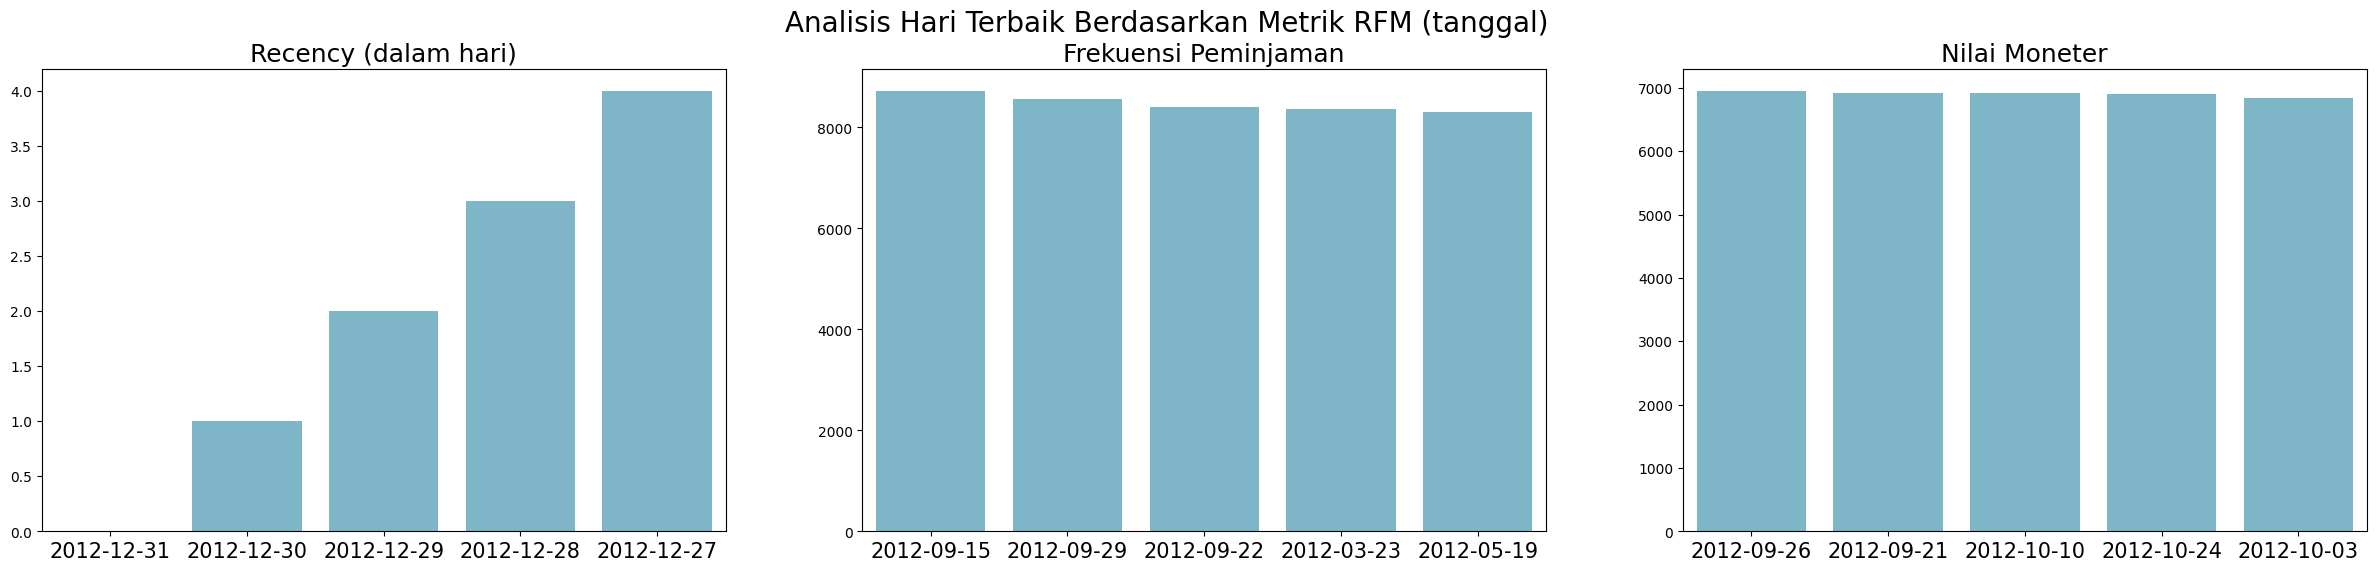

In [28]:
# Menghitung metrik RFM
tanggal_referensi = df_day['date_day'].max()
df_day['Rentang_Hari'] = (tanggal_referensi - df_day['date_day']).dt.days

# Menghitung Frequency
frekuensi_penggunaan = df_day.groupby('date_day')['total_count'].sum().reset_index()
frekuensi_penggunaan.columns = ['date_day', 'Frekuensi']

# Menghitung Monetary
moneter_pengguna = df_day.groupby('date_day')['registered'].sum().reset_index()
moneter_pengguna.columns = ['date_day', 'Nilai_Moneter']

# Menggabungkan ketiga metrik RFM menjadi satu DataFrame
rfm_df = df_day[['date_day', 'Rentang_Hari']].merge(frekuensi_penggunaan, on='date_day', how='left').merge(moneter_pengguna, on='date_day', how='left')

# Visualisasi Hari Terbaik Berdasarkan Metrik RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Menentukan warna untuk grafik batang
warna = ["#72BCD4"] * 5  # Warna yang digunakan untuk semua batang

# Membuat plot untuk Recency
sns.barplot(y="Rentang_Hari", x="date_day", data=rfm_df.sort_values(by="Rentang_Hari").head(5), palette=warna, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (dalam hari)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Membuat plot untuk Frequency
sns.barplot(y="Frekuensi", x="date_day", data=rfm_df.sort_values(by="Frekuensi", ascending=False).head(5), palette=warna, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frekuensi Peminjaman", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Membuat plot untuk Monetary
sns.barplot(y="Nilai_Moneter", x="date_day", data=rfm_df.sort_values(by="Nilai_Moneter", ascending=False).head(5), palette=warna, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Nilai Moneter", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

# Menambahkan judul utama untuk keseluruhan grafik
plt.suptitle("Analisis Hari Terbaik Berdasarkan Metrik RFM (tanggal)", fontsize=20)

# Menampilkan grafik
plt.show()


In [29]:
df_day.to_csv("data_day.csv", index=False)

In [30]:
df_hour.to_csv("data_hour.csv", index=False)

In [31]:
import pandas as pd

# Memuat dataset day.csv dan hour.csv
df_day = pd.read_csv("data_day.csv")
df_hour = pd.read_csv("data_hour.csv")

# Menggabungkan kedua dataset berdasarkan kolom yang sama, misalnya 'dteday'
# Sesuaikan 'dteday' dengan kolom yang ada pada dataset Anda untuk penggabungan
merged_data = pd.merge(df_day, df_hour, on='date_day', how='inner')  # Menggunakan inner join, bisa diganti dengan 'outer', 'left', atau 'right' sesuai kebutuhan

# Menyimpan hasil penggabungan ke dalam satu file CSV
merged_data.to_csv("main_data.csv", index=False)

print("Dataset berhasil digabungkan dan disimpan sebagai 'main_data.csv'.")


Dataset berhasil digabungkan dan disimpan sebagai 'main_data.csv'.


## Conclusion

Conclusion Pertanyaan 1:
Secara keseluruhan, analisis ini menunjukkan bahwa suhu memiliki pengaruh signifikan terhadap jumlah peminjaman sepeda. Dengan memahami hubungan ini, pengelola layanan penyewaan sepeda dapat lebih baik dalam memasarkan layanan mereka dan mempersiapkan armada sepeda di hari-hari dengan suhu tertentu, untuk meningkatkan pengalaman pengguna dan optimalisasi operasional.

Conclusion Pertanyaan 2:
Waktu dan musim yang terbaik untuk peminjaman sepeda adalah selama musim panas pada jam-jam sibuk di pagi dan sore.

Conclusion Pertanyaan 3:
Distribusi jumlah peminjaman sepeda bervariasi sepanjang minggu, dengan jumlah yang lebih tinggi di hari kerja dan cenderung menurun di akhir pekan. Pola ini memberikan insight bahwa penggunaan sepeda lebih dominan sebagai alat transportasi selama hari kerja dibandingkan untuk rekreasi di akhir pekan.

Conclusion Pertanyaan 4:
Rentang waktu sewa sepeda berpengaruh signifikan terhadap total jumlah peminjaman. Menawarkan paket sewa yang lebih fleksibel dan menguntungkan untuk waktu sewa yang lebih lama bisa menjadi strategi yang efektif untuk meningkatkan peminjaman sepeda.

Conclusion Pertanyaan 5:
Kondisi cuaca memiliki dampak besar pada peminjaman sepeda. Strategi pemasaran dan penawaran promosi harus mempertimbangkan kategori cuaca untuk meningkatkan jumlah peminjaman.


##Melalui analisis ini, kita dapat menyimpulkan bahwa berbagai faktor seperti suhu, kelembapan, dan waktu dalam sehari memiliki dampak signifikan terhadap peminjaman sepeda. Data yang dianalisis memberikan wawasan yang berguna untuk meningkatkan layanan sepeda, merencanakan strategi pemasaran, dan memahami kebiasaan pengguna sepeda dalam konteks yang lebih luas. Ini juga dapat membantu pengelola dalam merumuskan kebijakan berdasarkan perilaku pengguna dan tren peminjaman.